In [446]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs



'''cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
full.head()
#cap_head = pd.concat(cap_headx,cap_heady,cap_headz)
dataset = pd.concat( [full['55']/180,full['56']/180,full['57']/180,full['Wrist_L']/5600 ] , axis=1 )
dataset.head()
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()'''

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
f9 = pd.read_csv("/Users/houzhuo/Downloads/data/07_05/07_05.csv")
f10 = pd.read_csv("/Users/houzhuo/Downloads/data/07_06/07_06.csv")
f11 = pd.read_csv("/Users/houzhuo/Downloads/data/07_07/07_07.csv")
f12 = pd.read_csv("/Users/houzhuo/Downloads/data/07_08/07_08.csv")
f13 = pd.read_csv("/Users/houzhuo/Downloads/data/07_09/07_09.csv")
f14 = pd.read_csv("/Users/houzhuo/Downloads/data/07_10/07_10.csv")
f15 = pd.read_csv("/Users/houzhuo/Downloads/data/07_11/07_11.csv")

cap = pd.concat([f1,f2,f3,f4,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f5],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
t9 = pd.read_csv("/Users/houzhuo/Downloads/data/07_05/test3.csv")
t10 = pd.read_csv("/Users/houzhuo/Downloads/data/07_06/test3.csv")
t11 = pd.read_csv("/Users/houzhuo/Downloads/data/07_07/test3.csv")
t12 = pd.read_csv("/Users/houzhuo/Downloads/data/07_08/test3.csv")
t13 = pd.read_csv("/Users/houzhuo/Downloads/data/07_09/test3.csv")
t14 = pd.read_csv("/Users/houzhuo/Downloads/data/07_10/test3.csv")
t15 = pd.read_csv("/Users/houzhuo/Downloads/data/07_11/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t5],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()


(2765, 29) (2765, 18) (2765, 11)


,1,2,3,4,5,6,7,8,9,10,...,Hand_L,Hand_R,Elbow_L,Elbow_R,Forearm_L,Forearm_R,Shoulder_L,Shoulder_R,Shoulder_pitch_L,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2026.0,2624.000000,-1293.000000,1799.000000,2537.0,-2245.000000,-2196.000000,2243.000000,-254.000000,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2026.0,2623.736842,-1326.526316,1797.552632,2537.0,-2247.421053,-2196.736842,2240.684211,-240.421053,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2026.0,2623.473684,-1360.052632,1796.105263,2537.0,-2249.842105,-2197.473684,2238.368421,-226.842105,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2026.0,2623.210526,-1393.578947,1794.657895,2537.0,-2252.263158,-2198.210526,2236.052632,-213.263158,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2026.0,2622.947368,-1427.105263,1793.210526,2537.0,-2254.684211,-2198.947368,2233.736842,-199.684211,-498.789474


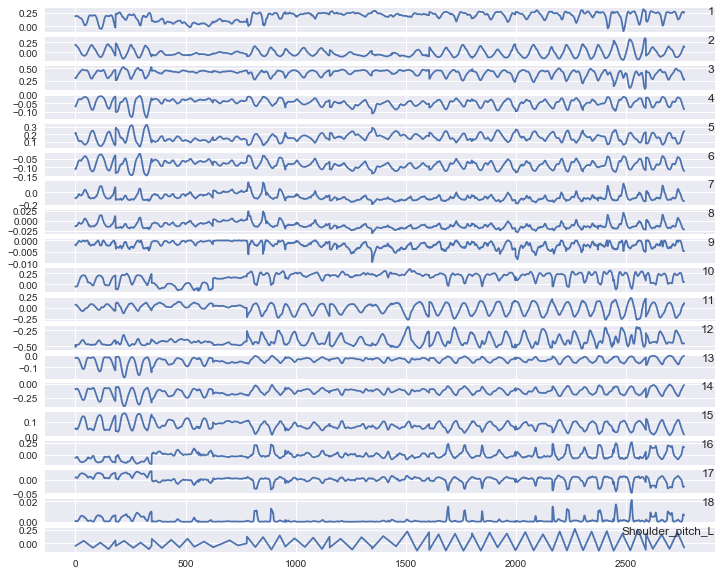

In [462]:
dataset = pd.concat([full['1']/180,full['2']/180,full['3']/180,full['4']/180,full['5']/180,full['6']/180,full['7']/180,full['8']/180,full['9']/180,#0.05
                    full['10']/180,full['11']/180,full['12']/180,full['13']/180,full['14']/180,full['15']/180,full['16']/180,full['17']/180,full['18']/180,full['Shoulder_pitch_L']/5600] , axis=1 )
#dataset = pd.concat([full['4']/180,full['5']/180,full['6']/180,full['13']/180,full['14']/180,full['15']/180,  full['Shoulder_pitch_L']/5600 ], axis=1 )#0.20
#dataset = pd.concat([full['5']/180,full['13']/180,full['14']/180, full['Elbow_L']/5600 ], axis=1 )#0.02
#dataset = pd.concat([full['4']/180,full['5']/180,full['6']/180, full['Elbow_R']/5600 ], axis=1 )#0.04
dataset.head()
#print(dataset.describe())

#elbow:5 14 16
#shoulder_R:2 11
#shoulder_putch_R:3
#hand_R:9 16
groups = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
i=1
plt.figure(figsize=(12,10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(dataset.values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
#dataset['Elbow_R']

In [463]:
from sklearn import preprocessing
values = dataset.values
#values = dataset.astype(np.float32)
n_features=18
#for i in range(4):
#    scaled[:,i] =values[:,i] - np.mean(values[:,i], axis = 0)

#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#for i in reversed(range(scaled.shape[1]-4)):
#    scaled[:,i+3] = scaled[:,i+3] - scaled[:,i]



#数据标准化   应该不适用，不是一个正常的分布
#ss_x = preprocessing.StandardScaler()  
#values = ss_x.fit_transform(dataset) 



train = values[:2400,:]
test = values[2400:,:]



n_obs = n_features
train_X,train_y = train[:,:n_obs],train[:,-1]
test_X,test_y = test[:,:n_obs],test[:,-1]
#val_X,val_y = val[:,:n_obs],val[:,-1]#第一个多少行

print(train_X.shape,test_X.shape)

(2400, 18) (365, 18)


predicting...
0.003989933344021609


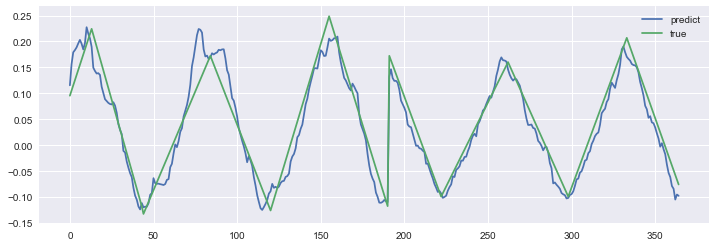

In [464]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection
rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
print('predicting...')
stack = StackingCVRegressor(regressors=(rf,xgb,ENet, KRR,lgb, gbm), 
                          meta_regressor=ENet)
'''
for clf, label in zip([rf,xgb, ENet, KRR, gbm,  stack], 
                      ['rf',
                       'XGBRegressor', 
                       'ENet', 
                       'KRR',
                       'gbm',
                       
                       'stack']):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=kf,scoring='neg_mean_squared_error'))
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))
'''
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(test_X)
print(rmsle(train_y, stack_train_pred))

plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(test_y, label = 'true')
plt.legend()
plt.show()

In [255]:
'''
#Validation function
n_folds = 5
#def rmsle_cv(model):
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
score= np.sqrt(-cross_val_score(stack, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))
#return(rmse)
#score = rmsle_cv(lasso)
print("\n stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''

'\n#Validation function\nn_folds = 5\n#def rmsle_cv(model):\nkf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)\nscore= np.sqrt(-cross_val_score(stack, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))\n#return(rmse)\n#score = rmsle_cv(lasso)\nprint("\n stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [240]:
#sclf.fit(train_X,train_y)


0.016312923718296797


In [221]:
test_y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.29981469, 0.29962938, 0.29944407, 0.29925876, 0.29907345,
       0.29888814, 0.29870283, 0.29851752, 0.29833221, 0.2981469 ,
       0.29796159, 0.29777628, 0.29759097, 0.29740566, 0.29722035,
       0.29703504, 0.29684973, 0.29666442, 0.29647911, 0.2962938 ,
       0.29610849, 0.29592318, 0.29573787, 0.29555256, 0.29536

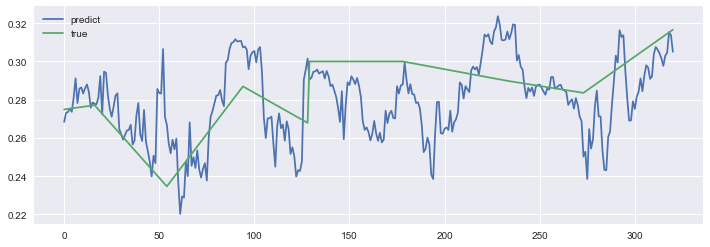